<a href="https://colab.research.google.com/github/papandene/Projet_NLP_Fouille_de_donnees/blob/main/Projet_NLP_Fouille_de_donnees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Projet HMIN326 -- Fouille de données

# Classification de documents par opinion
Encadrement :
Dino Ienco, Konstantin Todorov, Pascal Poncelet
Octobre 2020

Le but de ce projet consiste à mettre en oeuvre et évaluer des méthodes de classification de documents par opinion.
Le corpus

Un jeu de données textuelles nous est mis à disposition. Il s'agit d'un corpus de 10000 documents contenant des avis d'internautes sur des films. A chaque document est associé sa polarité selon l'avis (+1 : positif, -1 : négatif). Le fichier des documents est formaté dans un tableau cvs (un avis par ligne), un autre fichier csv contient les polarités d'avis par document (- 1/+1). Une correspondance directe existe entre les numéros des lignes des documents et les polarités.

## Etape 1 : Transformation des données

On utilise Scikit Learn à la place de WEKA pour effectuer les transformations et vectorisations donc pas besoin de transformer en .arff comme pour le cas WEKA.Par la suite, les valeurs textuelles doivent être rendues numériques en utilisant une pondération fréquentielle (tf-idf, tf, ou autres). normalisation !.



In [ ]:
import pandas as pd
import numpy as np
import nltk
import time
import re
from difflib import SequenceMatcher
import string 
import matplotlib.pyplot as plt
#Pour afficher les nuages de donnees
from wordcloud import WordCloud
import seaborn as sns
#from nltk.tokenize import word_tokenize 
from nltk import pos_tag,word_tokenize
from nltk.corpus import stopwords 
from nltk.corpus import wordnet 
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer 

In [ ]:
#permet de telecharger tous les bibliothèques
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw')
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
from google.colab import drive
from google.colab import output
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
Dataset=pd.read_csv('/content/gdrive/My Drive/Projet_Aissatou/dataset_fouille.csv', sep='\t', index_col=False, header = None)
Labels = pd.read_csv('/content/gdrive/My Drive/Projet_Aissatou/labels.csv', sep='\t', index_col=False, header = None)
Dataset.info()
pd.options.display.max_colwidth = 300

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


In [ ]:
Dataset.info()
Dataset.head(10)  # si on veut afficher 15 lignes sinon 5 par defaut .head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


,0
0,"I tried to finish this film three times, but it's god awful. Case in point: mom and daughter drive up to the bed and breakfast,mom stops for gas, crazy gas station weirdos mad at her hubby whose running the B&B; try to rape her. She escapes, heads to B&B; and instead of hubby going ballistic and..."
1,"I just got through watching this DVD at home. We love Westerns, so my husband rented it. He started apologizing to me half way through. The saddles, costumes, accents--everything was off. The part that made me so mad is where the guy didn't shoot the ""collector"" with his bow and arrow as he was ..."
2,"Oh my, this was the worst reunion movie I have ever seen. (That is saying a lot.) I am ashamed of watching.What happened in the script meetings? ""Ooooooh, I know! Let's have two stud muffins fall madly in love with the Most-Annoying-Character-Since-Cousin-Oliver."" ""Yeah, that'll be cool!""Even fo..."
3,"I'm sure this was one of those ""WOAH!"" attractions in 1982 when Epcot opened, but now it's just silly. The film's message is clich. The Circle-Vision is disorienting. And that awful song at the end is grating. And I really wish they'd install seats. After so much walking, all you want to do is s..."
4,"This was the worst movie I have ever seen Billy Zane in. I understand that this movie was mainly to showcase the new comers, who did pretty good for newbies, but over all, the movie was not believable.With all of the gunfire, you would think the police would have intervened. Even the coin being ..."
5,"We rented the DVD hoping for a good western. The film was pretty and the scenes reasonable, but the ideas were very bad. Here are my problems with the film.In the first part, why exactly did the bad guy kill the mine owner? Not really connected to the movie except to establish how bad he was and..."
6,"For months I've been hearing about this little movie and now I've seen it. I find it cute, cute how so many fledgling directors make movies where they combine other people's creative ideas in order to make their own one-joke premise of a movie. Troops, Swingblade, any of the million Blair Witch ..."
7,"I want to clarify a few things. I am not familiar with Ming-liang Tsai movies, and I am very familiar with art cinema; I grow up in the seventies times of Goddard, Fellini, Bergman, Bertolucci and many others.Art movies then were really ART; like paints. People did it to express their inner feel..."
8,"Designed only to annoy (or amuse) any self-respecting intelligent person. If the director's intention had been for the viewer to dislike the title character, then it would have been okay, but I know that there is no such thing as a Hollywood director who'd make a critique of America's pro-Marxis..."
9,"They changed the title of this atrocity to An Unexpected Love. The only thing worse is the film itself. The script contains dialogue that would be laughed out of a third grade play recital. At one point when the wife leaves the husband, a bad cover of All by Myself plays over the soundtrack! No ..."


In [ ]:
Labels.info()
Labels.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


,0
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
95,-1
96,-1
97,-1
98,-1


### Affichage et exploration du dataset

In [ ]:
""" Check for missing values: Machine learning models usually require complete data. """

#retourne le nombre de valeurs manquantes. refere aux cellules vides ou donnees absentes selon le modele 
#https://miamioh.instructure.com/courses/38817/pages/data-cleaning pour plus de comprehension a mettre en annexe
Dataset.isnull().sum()   

0    0
dtype: int64

#### Concatenation of the two files dataset and labels( in positive and negative )

In [ ]:
#Pour augmenter la largeur d'affichage
pd.set_option('display.max_columns', 350)

In [ ]:
#la concatenation va nous permettre de travailler sur un meme fichier, il suffit juste d'appeler la colonne concernee
fullDataset=pd.concat([Dataset,Labels],axis=1,ignore_index=True,verify_integrity=True)
fullDataset

,0,1
0,"I tried to finish this film three times, but it's god awful. Case in point: mom and daughter drive up to the bed and breakfast,mom stops for gas, crazy gas station weirdos mad at her hubby whose running the B&B; try to rape her. She escapes, heads to B&B; and instead of hubby going ballistic and...",-1
1,"I just got through watching this DVD at home. We love Westerns, so my husband rented it. He started apologizing to me half way through. The saddles, costumes, accents--everything was off. The part that made me so mad is where the guy didn't shoot the ""collector"" with his bow and arrow as he was ...",-1
2,"Oh my, this was the worst reunion movie I have ever seen. (That is saying a lot.) I am ashamed of watching.What happened in the script meetings? ""Ooooooh, I know! Let's have two stud muffins fall madly in love with the Most-Annoying-Character-Since-Cousin-Oliver."" ""Yeah, that'll be cool!""Even fo...",-1
3,"I'm sure this was one of those ""WOAH!"" attractions in 1982 when Epcot opened, but now it's just silly. The film's message is clich. The Circle-Vision is disorienting. And that awful song at the end is grating. And I really wish they'd install seats. After so much walking, all you want to do is s...",-1
4,"This was the worst movie I have ever seen Billy Zane in. I understand that this movie was mainly to showcase the new comers, who did pretty good for newbies, but over all, the movie was not believable.With all of the gunfire, you would think the police would have intervened. Even the coin being ...",-1
...,...,...
9995,"One of the very best Three Stooges shorts ever. A spooky house full of evil guys and ""The Goon"" challenge the Alert Detective Agency's best men. Shemp is in top form in the famous in-the-dark scene. Emil Sitka provides excellent support in his Mr. Goodrich role, as the target of a murder plot. B...",1
9996,"This film is close to be my favorite piece of celluloid. There is really not much I'd need or want to say here. Except maybe ""See this film"" and ""Enjoy the excellent work by Daniel and Pascal"", who carries you through this neat, funny and heartbreaking story about 'spending your eighth day' - yo...",1
9997,"I had lost faith in Sooraj R. Barjatya after the movie Main Prem Ki Deewani hoon, then a year back now I saw promos for Vivah which looked good. But I didn't want to waste my hard earned money watching it in cinema. When the film first came out on DVD I rented it and watched and I loved the movi...",1
9998,"This is one of the most calming, relaxing, and beautifully made animation films I've ever seen. With beautiful music throughout the movie, the sounds and music can make you feel like you're in the movie! This movie is not just great for kids, but adults too. It teaches you lessons, such as never...",1


In [ ]:
fullDataset=fullDataset.rename(columns={0:'comment', 
                                        1:'labels'
                                        })
fullDataset.columns

Index(['comment', 'labels'], dtype='object')

In [ ]:
Features=['comment','labels']
full_Dataset=pd.DataFrame(fullDataset,columns=Features)
full_Dataset

,comment,labels
0,"I tried to finish this film three times, but it's god awful. Case in point: mom and daughter drive up to the bed and breakfast,mom stops for gas, crazy gas station weirdos mad at her hubby whose running the B&B; try to rape her. She escapes, heads to B&B; and instead of hubby going ballistic and...",-1
1,"I just got through watching this DVD at home. We love Westerns, so my husband rented it. He started apologizing to me half way through. The saddles, costumes, accents--everything was off. The part that made me so mad is where the guy didn't shoot the ""collector"" with his bow and arrow as he was ...",-1
2,"Oh my, this was the worst reunion movie I have ever seen. (That is saying a lot.) I am ashamed of watching.What happened in the script meetings? ""Ooooooh, I know! Let's have two stud muffins fall madly in love with the Most-Annoying-Character-Since-Cousin-Oliver."" ""Yeah, that'll be cool!""Even fo...",-1
3,"I'm sure this was one of those ""WOAH!"" attractions in 1982 when Epcot opened, but now it's just silly. The film's message is clich. The Circle-Vision is disorienting. And that awful song at the end is grating. And I really wish they'd install seats. After so much walking, all you want to do is s...",-1
4,"This was the worst movie I have ever seen Billy Zane in. I understand that this movie was mainly to showcase the new comers, who did pretty good for newbies, but over all, the movie was not believable.With all of the gunfire, you would think the police would have intervened. Even the coin being ...",-1
...,...,...
9995,"One of the very best Three Stooges shorts ever. A spooky house full of evil guys and ""The Goon"" challenge the Alert Detective Agency's best men. Shemp is in top form in the famous in-the-dark scene. Emil Sitka provides excellent support in his Mr. Goodrich role, as the target of a murder plot. B...",1
9996,"This film is close to be my favorite piece of celluloid. There is really not much I'd need or want to say here. Except maybe ""See this film"" and ""Enjoy the excellent work by Daniel and Pascal"", who carries you through this neat, funny and heartbreaking story about 'spending your eighth day' - yo...",1
9997,"I had lost faith in Sooraj R. Barjatya after the movie Main Prem Ki Deewani hoon, then a year back now I saw promos for Vivah which looked good. But I didn't want to waste my hard earned money watching it in cinema. When the film first came out on DVD I rented it and watched and I loved the movi...",1
9998,"This is one of the most calming, relaxing, and beautifully made animation films I've ever seen. With beautiful music throughout the movie, the sounds and music can make you feel like you're in the movie! This movie is not just great for kids, but adults too. It teaches you lessons, such as never...",1


In [ ]:
#compte les categories de labels
fullDataset['labels'].value_counts()

-1    5000
 1    5000
Name: labels, dtype: int64

## Visualisation graphique

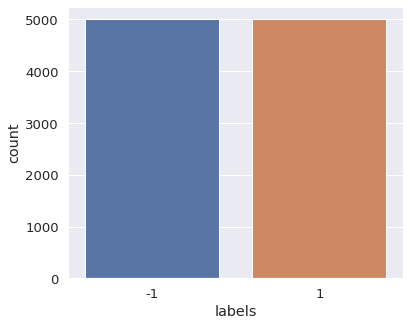

In [ ]:
plt.figure(figsize=(6,5))
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(x=fullDataset.labels, y=None)

### Afficher les mots positifs de notre dataset sous format nuages

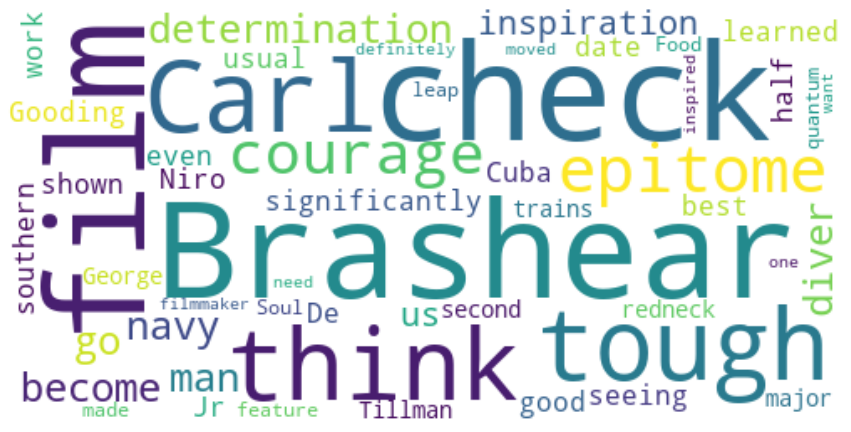

In [ ]:
#wordcloud permet de générer les nuages de mot
#En utilisant le package Wordcloud , nous pourrons générer une image qui nous donne les mots les plus représentatifs 
#dans un ensemble de critiques choisi. Ici nous avons choisi les 150 mots les plus répétés
positive_values = fullDataset[(fullDataset.comment.notnull()) & (fullDataset.labels == 1)]
wordcloud = WordCloud(width=500,height=250, max_font_size=80, max_words=150, background_color="white").generate(positive_values.comment[5000])

f = plt.figure() 
f.set_figwidth(15) 
f.set_figheight(10)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### Visualisation des mots négatifs sous format nuages

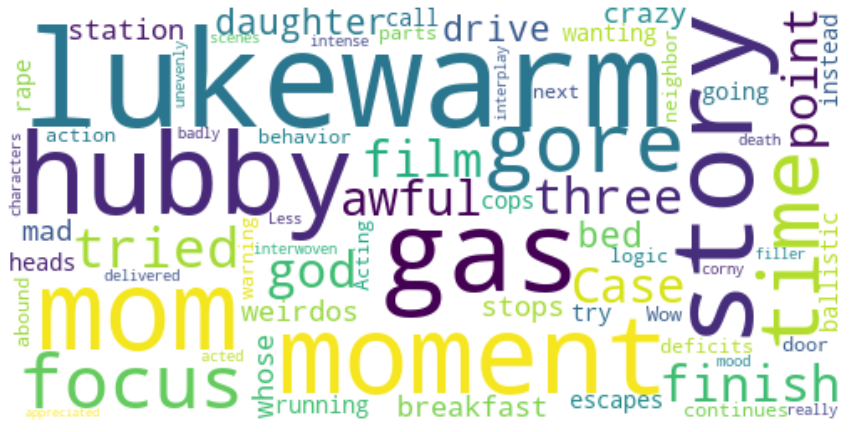

In [ ]:
negative_values = fullDataset[(fullDataset.comment.notnull()) & (fullDataset.labels == -1)]

wordcloud = WordCloud(width=500,height=250, max_font_size=80, max_words=150, background_color="white").generate(negative_values.comment[0])

f = plt.figure() 
f.set_figwidth(15) 
f.set_figheight(10)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
 
plt.show()

## Etape 2 : Prétraitements des documents
Vous utiliserez les différents types de données d'entrée selon les prétraitements. ​Le but est d'utiliser vos textes avec différentes informations, en préparant 3 versions du corpus :
(1) Textes bruts (avec ou sans suppression de stop-words),
(2) Textes lemmatisés,
(3) Textes lemmatisés avec analyse morphosyntaxique (à l'aide de l'outil Tree-tagger vu en cours).


* corriger les contractions
* enlever les caracteres inutiles
* considerer que les mots alphanumeriques


In [ ]:
!pip install contractions

     |████████████████████████████████| 317kB 4.1MB/s 
     |████████████████████████████████| 245kB 17.1MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81702 sha256=991cda6b08bf76d3ab4226f91ce4fcff3812f7b39d163e4ec2c18bb41caedcfb
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [ ]:
# Check for whitespace strings (it's OK if there aren't any!):
blanks = []  # start with an empty list

for index,message,labels in full_Dataset.itertuples():  # iterate over the DataFrame
    if type(labels)==str:            # avoid NaN values
        if labels.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list
        
print(len(blanks))

# le resultat de la longueur de la liste blanks est 0 donc pas de whitespace
" =============================================== "

text = fullDataset['comment']

#corriger les contractions
import contractions
comments=text.apply(contractions.fix)

#expression reguliere qui remplace les caracteres differents de A a z - ' et espace par rien('') 
#ou plutot un espace afin d'eviter deux mots separes par une ponctuation d'etre colles
#les whitespaces ou espace > 1 par 1 seul espace
#On pouvait transformer les valeurs numeriques en texte mais c'est pas interessant
#garder les - pour les mots composes
comments = comments.str.replace('[^A-z -]',' ').str.replace(' +',' ').str.strip()

#splitwords = [ nltk.word_tokenize( str(message) ) for message in messages ]  # une facon de tokeniser
#print(splitwords)  # ne s'affiche pas trop large



0


####  Tokenisation du texte brut 

In [ ]:
comments_bruts = comments.copy().apply(word_tokenize)  # une seconde maniere d'appliquer le meme outil
comments_bruts.head()                                  # par defaut les 5 premieres lignes

0    [I, tried, to, finish, this, film, three, times, but, it, is, god, awful, Case, in, point, mom, and, daughter, drive, up, to, the, bed, and, breakfast, mom, stops, for, gas, crazy, gas, station, weirdos, mad, at, her, hubby, whose, running, the, B, B, try, to, rape, her, She, escapes, heads, to,...
1    [I, just, got, through, watching, this, DVD, at, home, We, love, Westerns, so, my, husband, rented, it, He, started, apologizing, to, me, half, way, through, The, saddles, costumes, accents, --, everything, was, off, The, part, that, made, me, so, mad, is, where, the, guy, did, not, shoot, the, ...
2    [Oh, my, this, was, the, worst, reunion, movie, I, have, ever, seen, That, is, saying, a, lot, I, am, ashamed, of, watching, What, happened, in, the, script, meetings, Ooooooh, I, know, let, us, have, two, stud, muffins, fall, madly, in, love, with, the, Most-Annoying-Character-Since-Cousin-Oliv...
3    [I, am, sure, this, was, one, of, those, WOAH, attractions, in, when, Epcot, ope

#### Texte brut avec suppression stop-words

* supprimer les stop-words

In [ ]:
#importer les stop words en anglais 
stopwords = nltk.corpus.stopwords.words('english')
new_words = ('us','oh')
for word in new_words:
   stopwords.append(word) #personnalisation de nos stopwords

def supprime_sw_and_nonalpha(text): # meme chose que la fonction remove_stopwords
    return [word for word in text if word.lower() not in stopwords and word.isalpha()] 

def remove_stopwords(text):
    words = []
    for word in text:
            if word.lower() not in stopwords:
                words.append(word)

    return words


comments_bruts_sans_sw = comments.copy().apply(word_tokenize).apply(remove_stopwords)
#messages_bruts_sans_sw = messages_bruts_sans_sw.apply(lambda sentence: [item for item in sentence if item not in stopwords])
comments_bruts_sans_sw.head()                         

0    [tried, finish, film, three, times, god, awful, Case, point, mom, daughter, drive, bed, breakfast, mom, stops, gas, crazy, gas, station, weirdos, mad, hubby, whose, running, B, B, try, rape, escapes, heads, B, B, instead, hubby, going, ballistic, wanting, call, cops, story, continues, lukewarm, ...
1    [got, watching, DVD, home, love, Westerns, husband, rented, started, apologizing, half, way, saddles, costumes, accents, --, everything, part, made, mad, guy, shoot, collector, bow, arrow, taking, fat, guy, soul, excuse, arrows, left, watched, way, someone, else, said, many, bad, things, single,...
2    [worst, reunion, movie, ever, seen, saying, lot, ashamed, watching, happened, script, meetings, Ooooooh, know, let, two, stud, muffins, fall, madly, love, Most-Annoying-Character-Since-Cousin-Oliver, Yeah, cool, Even, sitcoms, implausible, plot, since, Ron, Popeil, starting, spray, painting, bal...
3    [sure, one, WOAH, attractions, Epcot, opened, silly, film, message, clich, Circl

#### Lemmatisation avec wordnet

In [ ]:
# lemmatisation en considerant les noms, adjectifs, adverbes et verbes

# lemmatise le mot word selon sa categorie de tag mais pas efficace, 
#ignore des mots plutot definir une fonction pour chaque type de tag
def lemmatize_withtag(word,tag):   
    wn = WordNetLemmatizer()
    if tag.startswith("NN"):  #noun
        return wn.lemmatize(word, pos='n')
    elif tag.startswith('VB'): #verbe
        return wn.lemmatize(word, pos='v')
    elif tag.startswith('JJ'): #adjectif
        return wn.lemmatize(word, pos='a')
    elif tag.startswith('RB'): #adverbe
        return wn.lemmatize(word, pos='r')
    else:
        return word

#la librairie pos_tag renvoie la liste des mots d'un texte avec la categorie de tag pour chaque
def lemmatize_text_verbe(text):
    return [wn.lemmatize(word, pos='v') for word in text]
def lemmatize_text_nom(text):
    return [wn.lemmatize(word, pos='n') for word in text]
def lemmatize_text_adj(text):
    return [wn.lemmatize(word, pos='a') for word in text]
def lemmatize_text_adv(text):
    return [wn.lemmatize(word, pos='r') for word in text]

comments_lemmes_wnet = comments_bruts_sans_sw.copy().apply(lemmatize_text_verbe)
comments_lemmes_wnet = comments_lemmes_wnet.apply(lemmatize_text_nom)
comments_lemmes_wnet = comments_lemmes_wnet.apply(lemmatize_text_adj)
comments_lemmes_wnet = comments_lemmes_wnet.apply(lemmatize_text_adv)


comments_lemmes_wnet.head()    

0    [try, finish, film, three, time, god, awful, Case, point, mom, daughter, drive, bed, breakfast, mom, stop, gas, crazy, gas, station, weirdo, mad, hubby, whose, run, B, B, try, rape, escape, head, B, B, instead, hubby, go, ballistic, want, call, cop, story, continue, lukewarm, behavior, part, Wow...
1    [get, watch, DVD, home, love, Westerns, husband, rent, start, apologize, half, way, saddle, costume, accent, --, everything, part, make, mad, guy, shoot, collector, bow, arrow, take, fat, guy, soul, excuse, arrow, leave, watch, way, someone, else, say, many, bad, thing, single, one, reason, suck...
2                       [bad, reunion, movie, ever, see, say, lot, ashamed, watch, happen, script, meet, Ooooooh, know, let, two, stud, muffin, fall, madly, love, Most-Annoying-Character-Since-Cousin-Oliver, Yeah, cool, Even, sitcom, implausible, plot, since, Ron, Popeil, start, spray, paint, bald, men]
3    [sure, one, WOAH, attraction, Epcot, open, silly, film, message, clich, Circle-V

#### Lemmatisation avec la librairie spacy

In [ ]:
from spacy import displacy
import spacy
nlp = spacy.load('en_core_web_sm')

doc = nlp(u"A three movie I really wanted to love was terrible. \
I'm sure the producers had the best intentions, but the execution was lacking.")
displacy.render(doc, style='ent', jupyter=True)


In [ ]:
#cette partie de code mets du temps a l'execution. Patience !

comments_lemmes_spacy = comments.copy().apply(nlp)

#affiche le resultat pour les 5 premieres lignes
for comment in comments_lemmes_spacy.head():
    displacy.render(comment, style='ent', jupyter=True)
    #print([token.lemma_ for token in message])



In [ ]:
#displacy.render(comments_lemmes_spacy.head(), style='ent', jupyter=True) 
#comments_lemmes_spacy  displacy.render(messages_lemmes_spacy.head(), style='ent', jupyter=True)

## Etape 3 : Mise en oeuvre d'algorithmes de classification
La suite du travail consistera à utiliser Weka et à évaluer rigoureusement les résultats de classification obtenus en prenant en entrée les différents corpus préparés dans l'étape précédent. Rappelons que de nombreuses approches d'apprentissage peuvent alors être utilisées pour la classification de textes :
• K plus proches voisins,
• Arbres de décisions,
• Naïve Bayes,
• Machines à support de vecteurs 
• Les règles d'association
• Ensemble classifier

Paramétrage : Pour chaque méthode de classification, il existe plusieurs paramètres à choisir, tels que le paramètre K de l'algorithme des KPPV, le noyau pour les SVM, le support pour les règles, etc.

Dans le cas de Scikit Learn, il est possible d’utiliser la fonction gridsearchCV pour tester différents classifieurs.


In [ ]:
# librairie pour la classification
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.pipeline import Pipeline

### Split the data into train & test sets:

In [ ]:
X = fullDataset['comment']  # full_Dataset['comment'] after tokenisation this time we want to look at the text
y = fullDataset['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train_t, X_test_t, y_train, y_test = train_test_split(X.apply(word_tokenize), y, test_size=0.33, random_state=42)

# Scikit-learn's CountVectorizer
Text preprocessing, tokenizing and the ability to filter out stopwords are all included in CountVectorizer, which builds a dictionary of features and transforms documents to feature vectors.

In [ ]:
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(6700, 42772)

This shows that our training set is comprised of 6700 documents, and 42772 features.

### Transform Counts to Frequencies with Tf-idf
While counting words is helpful, longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.
To avoid this we can simply divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called tf for Term Frequencies.
Another refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.
This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”.
Both tf and tf–idf can be computed as follows using TfidfTransformer:

In [ ]:
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape
print(X_train_tfidf)

  (0, 42532)	0.04128334058878021
  (0, 42194)	0.09495117151735334
  (0, 41757)	0.04761767256923063
  (0, 41685)	0.11690733435146158
  (0, 41648)	0.10114582424908976
  (0, 41603)	0.06096008315825841
  (0, 41438)	0.06443192803437066
  (0, 41386)	0.07454687373518655
  (0, 41340)	0.03791724578757372
  (0, 40728)	0.22383345380321026
  (0, 40331)	0.14856437200558248
  (0, 38521)	0.0278554112051621
  (0, 38199)	0.057129492256631005
  (0, 38044)	0.36923109076258115
  (0, 37010)	0.19901695177516948
  (0, 36571)	0.10971684842510662
  (0, 36357)	0.12026903992043905
  (0, 35397)	0.12512122675140638
  (0, 35290)	0.11159556446331846
  (0, 35129)	0.09238697293615525
  (0, 33748)	0.1199848800061202
  (0, 33489)	0.055046882796762335
  (0, 27124)	0.23833722702190524
  (0, 26931)	0.09070523977471553
  (0, 26856)	0.04970353312432364
  :	:
  (6699, 5079)	0.06956371478514543
  (6699, 4940)	0.05121017276634345
  (6699, 4891)	0.09108295072710892
  (6699, 4742)	0.09570588629855062
  (6699, 4668)	0.098865342698

### Combine Steps with TfidVectorizer
In the future, we can combine the CountVectorizer and TfidTransformer steps into one using TfidVectorizer:

In [ ]:
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(6700, 42772)

# Train  Classifiers

### *** Earlier we named our SVC classifier svc_model. Here we're using the more generic name clf (for classifier).

# Test classifiers and display results

### 1 - Machines à support de vecteurs 
Here we'll introduce an SVM classifier that's similar to SVC, called LinearSVC. LinearSVC handles sparse input better, and scales well to large numbers of samples.

####  Build a Pipeline
Remember that only our training set has been vectorized into a full vocabulary. In order to perform an analysis on our test set we'll have to submit it to the same procedures. Fortunately scikit-learn offers a Pipeline class that behaves like a compound classifier.

In [ ]:

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('text_clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('text_clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
          

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [ ]:
# Report the confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[1500  178]
 [ 126 1496]]


In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.92      0.89      0.91      1678
           1       0.89      0.92      0.91      1622

    accuracy                           0.91      3300
   macro avg       0.91      0.91      0.91      3300
weighted avg       0.91      0.91      0.91      3300



In [ ]:
# Print the overall accuracy
acc1 = metrics.accuracy_score(y_test,predictions)
print('The prediction score :',acc1)

The prediction score : 0.9078787878787878


## ==========  Sentence of test  =======

In [ ]:
myreview = "A movie I really wanted to love was terrible. \
I'm sure the producers had the best intentions, but the execution was lacking."

In [ ]:
print(text_clf.predict([myreview]))  # be sure to put "myreview" inside square brackets

[-1]


#### interpretation
[-1] means that the opinion is negative  

In [ ]:
myreview2 = "A movie I really liked."

In [ ]:
print(text_clf.predict([myreview2]))  # be sure to put "myreview" inside square brackets

[1]


[1] means that the opinion is positive


### 2- K plus proches voisins

In [ ]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('text_clf', KNeighborsClassifier()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('text_clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=

In [ ]:
predictions2 = text_clf.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions2))


[[1265  413]
 [ 348 1274]]


In [ ]:
print(metrics.classification_report(y_test,predictions2))

              precision    recall  f1-score   support

          -1       0.78      0.75      0.77      1678
           1       0.76      0.79      0.77      1622

    accuracy                           0.77      3300
   macro avg       0.77      0.77      0.77      3300
weighted avg       0.77      0.77      0.77      3300



In [ ]:
acc2 = metrics.accuracy_score(y_test,predictions2)
print('The prediction score :',acc2)

The prediction score : 0.7693939393939394


### 3 - Arbre de decision

In [ ]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('text_clf', DecisionTreeClassifier()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('text_clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
          

In [ ]:
predictions3 = text_clf.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions3))


[[1220  458]
 [ 404 1218]]


In [ ]:
print(metrics.classification_report(y_test,predictions3))

              precision    recall  f1-score   support

          -1       0.75      0.73      0.74      1678
           1       0.73      0.75      0.74      1622

    accuracy                           0.74      3300
   macro avg       0.74      0.74      0.74      3300
weighted avg       0.74      0.74      0.74      3300



In [ ]:
acc3 = metrics.accuracy_score(y_test,predictions3)
print('The prediction score :',acc3)

The prediction score : 0.7387878787878788


### 4 - Train a naïve Bayes classifier:

In [ ]:
# Naïve Bayes:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('text_clf', MultinomialNB()),
])


In [ ]:
# Run predictions and analyze the results (naïve Bayes) 
text_clf.fit(X_train, y_train)
# Form a prediction set
predictions4 = text_clf.predict(X_test)
# Report the confusion matrix
print(metrics.confusion_matrix(y_test,predictions4))
# Print a classification report
print(metrics.classification_report(y_test,predictions4))

[[1533  145]
 [ 245 1377]]
              precision    recall  f1-score   support

          -1       0.86      0.91      0.89      1678
           1       0.90      0.85      0.88      1622

    accuracy                           0.88      3300
   macro avg       0.88      0.88      0.88      3300
weighted avg       0.88      0.88      0.88      3300



In [ ]:
# Print the overall accuracy
acc4 = metrics.accuracy_score(y_test,predictions4)
print('The prediction score :',acc4)

The prediction score : 0.8818181818181818


### 5 - LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('text_clf', LogisticRegression()),
])


In [ ]:
# Run predictions and analyze the results (naïve Bayes) 
text_clf.fit(X_train, y_train)
# Form a prediction set
predictions5 = text_clf.predict(X_test)
# Report the confusion matrix
print(metrics.confusion_matrix(y_test,predictions5))
# Print a classification report
print(metrics.classification_report(y_test,predictions5))

[[1479  199]
 [ 138 1484]]
              precision    recall  f1-score   support

          -1       0.91      0.88      0.90      1678
           1       0.88      0.91      0.90      1622

    accuracy                           0.90      3300
   macro avg       0.90      0.90      0.90      3300
weighted avg       0.90      0.90      0.90      3300



In [ ]:
# Print the overall accuracy
acc5 = metrics.accuracy_score(y_test,predictions5)
print('The prediction score :',acc5)

The prediction score : 0.8978787878787878


### 6 - Ensemble Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('SVM', LinearSVC()), ('DTree', DecisionTreeClassifier()), ('KPPVoisin', KNeighborsClassifier()), ('NaiveBaye', MultinomialNB())], voting='hard')
voting_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('voting_clf', MultinomialNB()),
])


In [ ]:
# Run predictions and analyze the results (naïve Bayes) 
voting_clf.fit(X_train, y_train)
# Form a prediction set
predictions6 = voting_clf.predict(X_test)
# Report the confusion matrix
print(metrics.confusion_matrix(y_test,predictions6))
# Print a classification report
print(metrics.classification_report(y_test,predictions6))

[[1533  145]
 [ 245 1377]]
              precision    recall  f1-score   support

          -1       0.86      0.91      0.89      1678
           1       0.90      0.85      0.88      1622

    accuracy                           0.88      3300
   macro avg       0.88      0.88      0.88      3300
weighted avg       0.88      0.88      0.88      3300



In [ ]:
# Print the overall accuracy
acc6 = metrics.accuracy_score(y_test,predictions6)
print('The prediction score :',acc6)

The prediction score : 0.8818181818181818


# Comparaison

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


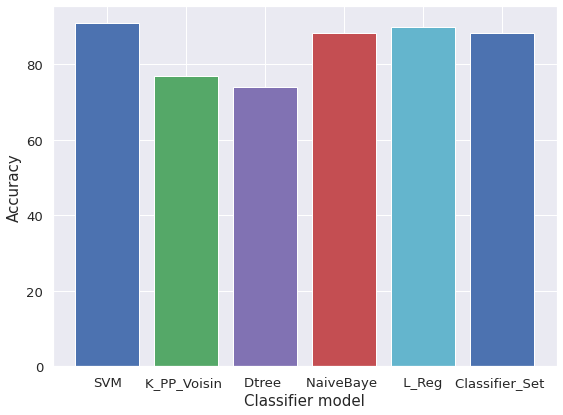

In [ ]:

fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
models = ['SVM', 'K_PP_Voisin ', 'Dtree ', 'NaiveBaye ' , ' L_Reg ','Classifier_Set ']
accurisy = [acc1*100 ,acc2*100,acc3*100,acc4*100,acc5*100,acc6*100]
ax.bar(models,accurisy,color = 'bgmrc',width = 0.8) 
plt.xlabel("Classifier model",size=15)
plt.ylabel("Accuracy",size=15)
 
plt.show()

# Conclusion 